In [1]:
cd C:/Users/User/Desktop/MLDM Ass

C:\Users\User\Desktop\MLDM Ass


In [2]:
import pandas as pd

In [3]:
data= pd.read_csv('apartments_for_rent_classified_10K.csv', delimiter=';', encoding='ISO-8859-1')

In [4]:
data

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,...,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,...,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,...,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,...,"$4,790",Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [5]:
# Extracting the selected features: 'price', 'square_feet', and 'bedrooms'
selected_features = data[['price', 'square_feet','bedrooms']]

In [6]:
selected_features

,price,square_feet,bedrooms
0,790,101,0.0
1,425,106,1.0
2,1390,107,0.0
3,925,116,0.0
4,880,125,0.0
...,...,...,...
9995,6000,6300,5.0
9996,25000,8716,6.0
9997,11000,11318,6.0
9998,4790,40000,1.0


In [7]:
null_values = selected_features.isnull().sum()

In [8]:
null_values

price          0
square_feet    0
bedrooms       7
dtype: int64

In [9]:
# Removing rows with missing values
selected_features = selected_features.dropna()

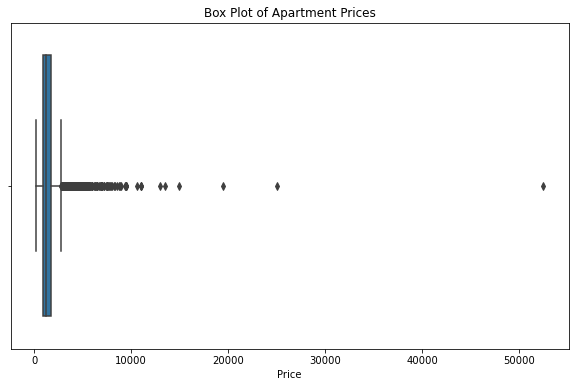

In [10]:
# Creating a box plot for the 'price'
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=selected_features['price'])
plt.title('Box Plot of Apartment Prices')
plt.xlabel('Price')
plt.show()

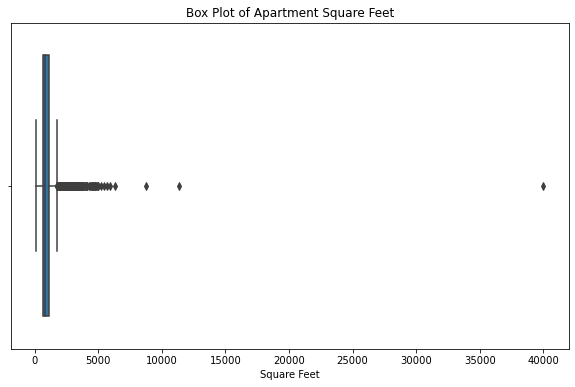

In [11]:
# Creating a box plot for the 'square_feet'
plt.figure(figsize=(10, 6))
sns.boxplot(x=selected_features['square_feet'])
plt.title('Box Plot of Apartment Square Feet')
plt.xlabel('Square Feet')
plt.show()

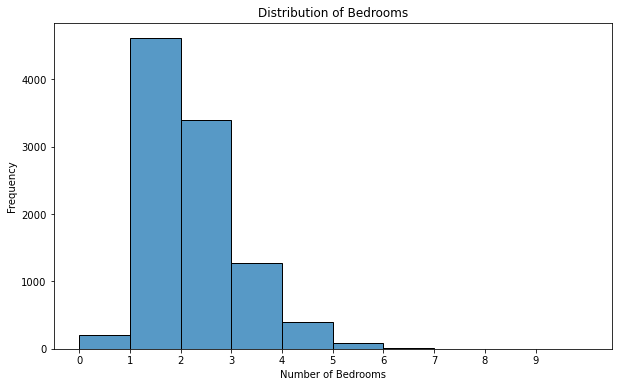

In [12]:
# Visualizing the distribution of the 'bedrooms' column with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(selected_features['bedrooms'].dropna(), bins=range(int(selected_features['bedrooms'].min()), int(selected_features['bedrooms'].max()) + 2), kde=False)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.xticks(range(int(selected_features['bedrooms'].min()), int(selected_features['bedrooms'].max()) + 1))
plt.show()

In [13]:
# Calculating the IQR for each feature in selected_features
Q1 = selected_features.quantile(0.25)
Q3 = selected_features.quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the data in selected_features to remove outliers
selected_features = selected_features[~((selected_features < lower_bound) | 
                                                 (selected_features > upper_bound)).any(axis=1)]

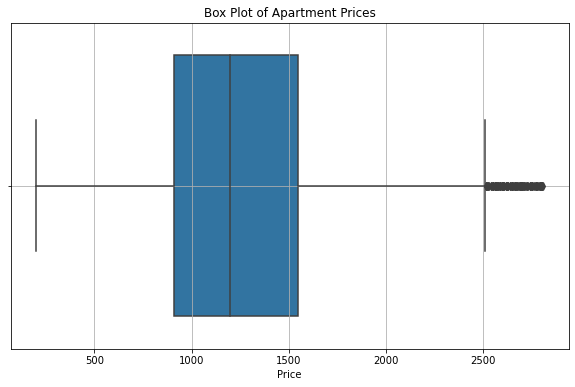

In [14]:
# Creating a box plot for the 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=selected_features['price'])
plt.title('Box Plot of Apartment Prices')
plt.xlabel('Price')
plt.grid(True)
plt.show()

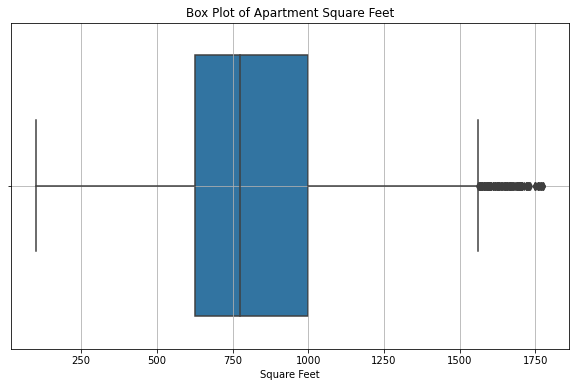

In [15]:
# Creating a box plot for the 'square_feet'
plt.figure(figsize=(10, 6))
sns.boxplot(x=selected_features['square_feet'])
plt.title('Box Plot of Apartment Square Feet')
plt.xlabel('Square Feet')
plt.grid(True)
plt.show()

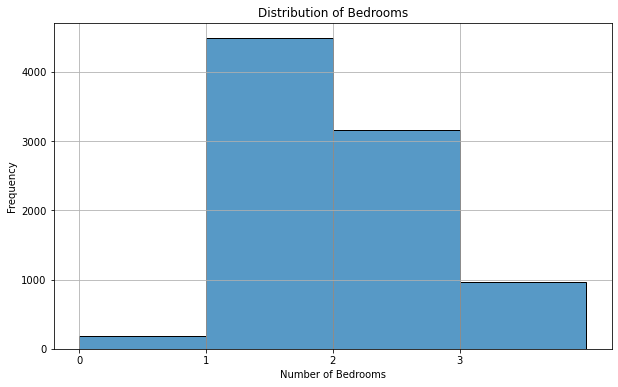

In [16]:
# Visualizing the distribution of the 'bedrooms' column with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(selected_features['bedrooms'].dropna(), bins=range(int(selected_features['bedrooms'].min()), int(selected_features['bedrooms'].max()) + 2), kde=False)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.xticks(range(int(selected_features['bedrooms'].min()), int(selected_features['bedrooms'].max()) + 1))
plt.grid(True)
plt.show()

In [17]:
# Calculating percentiles for 'price' and 'square_feet'
price_95th_percentile = selected_features['price'].quantile(0.95)
square_feet_25th_percentile = selected_features['square_feet'].quantile(0.25)
square_feet_95th_percentile = selected_features['square_feet'].quantile(0.95)
price_25th_percentile = selected_features['price'].quantile(0.25)

# Filter for High Price and Low Square Feet
filtered_high_price_low_sqft = selected_features[(selected_features['price'] <= price_95th_percentile) | 
                                                 (selected_features['square_feet'] > square_feet_25th_percentile)]

# Filter for High Square Feet and Low Price
filtered_high_sqft_low_price = selected_features[(selected_features['square_feet'] <= square_feet_95th_percentile) | 
                                                 (selected_features['price'] > price_25th_percentile)]

# Applying both filters
selected_features = selected_features[
    ((selected_features['price'] <= price_95th_percentile) | 
     (selected_features['square_feet'] > square_feet_25th_percentile)) &
    ((selected_features['square_feet'] <= square_feet_95th_percentile) | 
     (selected_features['price'] > price_25th_percentile))
]


In [18]:
selected_features

,price,square_feet,bedrooms
0,790,101,0.0
1,425,106,1.0
2,1390,107,0.0
3,925,116,0.0
4,880,125,0.0
...,...,...,...
9372,1449,1767,3.0
9373,1299,1772,3.0
9375,2000,1775,3.0
9376,1400,1776,3.0


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np 

# Separating the features
price_square_feet = selected_features[['price', 'square_feet']]
bedrooms = selected_features[['bedrooms']]

# Applying StandardScaler to 'price' and 'square_feet'
standard_scaler = StandardScaler()
scaled_price_square_feet = standard_scaler.fit_transform(price_square_feet)

# Applying MinMaxScaler to 'bedrooms'
minmax_scaler = MinMaxScaler()
scaled_bedrooms = minmax_scaler.fit_transform(bedrooms)

# Combining the scaled features
scaled_features= np.hstack((scaled_price_square_feet, scaled_bedrooms))

# Creating a DataFrame of the scaled features for clustering
scaled_features_df = pd.DataFrame(scaled_features, columns=['price_scaled', 'square_feet_scaled', 'bedrooms_scaled'])
scaled_features_df.head()


,price_scaled,square_feet_scaled,bedrooms_scaled
0,-1.008958,-2.453941,0.000000
1,-1.774104,-2.436975,0.333333
2,0.248814,-2.433582,0.000000
3,-0.725960,-2.403045,0.000000
4,-0.820292,-2.372507,0.000000


In [20]:
scaled_features_df

,price_scaled,square_feet_scaled,bedrooms_scaled
0,-1.008958,-2.453941,0.000000
1,-1.774104,-2.436975,0.333333
2,0.248814,-2.433582,0.000000
3,-0.725960,-2.403045,0.000000
4,-0.820292,-2.372507,0.000000
...,...,...,...
8740,0.372495,3.198893,1.000000
8741,0.058052,3.215858,1.000000
8742,1.527550,3.226037,1.000000
8743,0.269777,3.229430,1.000000


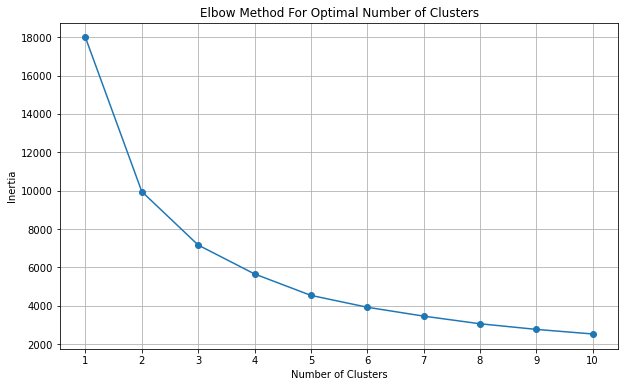

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the Elbow Method
inertia = []
range_of_clusters = range(1, 11)

for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++',random_state=40)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range_of_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_of_clusters)
plt.grid(True)
plt.show()


In [22]:
# Applying K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to our scaled DataFrame for analysis
scaled_features_df = pd.DataFrame(scaled_features, columns=selected_features.columns)
scaled_features_df['Cluster'] = cluster_labels

# Displaying the first few rows of the DataFrame with cluster labels
scaled_features_df.head()

,price,square_feet,bedrooms,Cluster
0,-1.008958,-2.453941,0.000000,2
1,-1.774104,-2.436975,0.333333,2
2,0.248814,-2.433582,0.000000,2
3,-0.725960,-2.403045,0.000000,2
4,-0.820292,-2.372507,0.000000,2


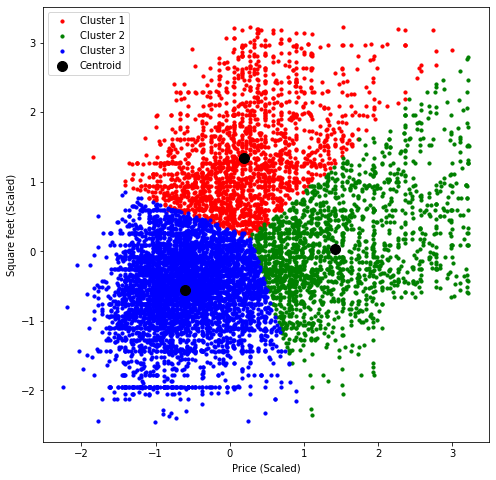

In [33]:
plt.figure(figsize= (8,8))
plt.scatter(scaled_features[cluster_labels == 0, 0], scaled_features[cluster_labels == 0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(scaled_features[cluster_labels == 1, 0], scaled_features[cluster_labels == 1, 1], s=10, c='green', label='Cluster 2')
plt.scatter(scaled_features[cluster_labels == 2, 0], scaled_features[cluster_labels == 2, 1], s=10, c='blue', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroid')
plt.xlabel('Price (Scaled)')
plt.ylabel('Square feet (Scaled)')
plt.legend()
plt.show()

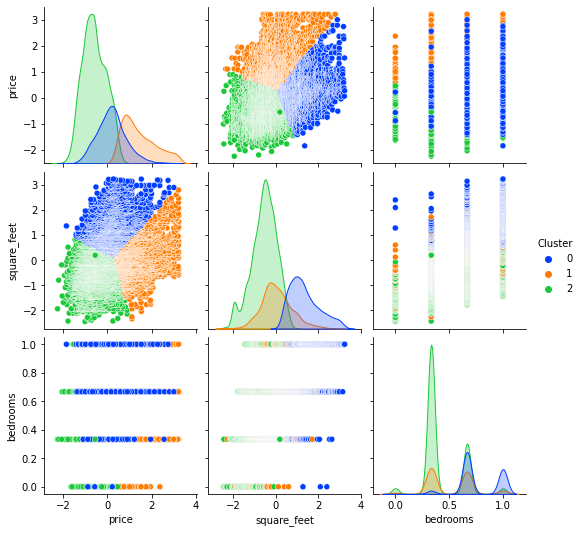

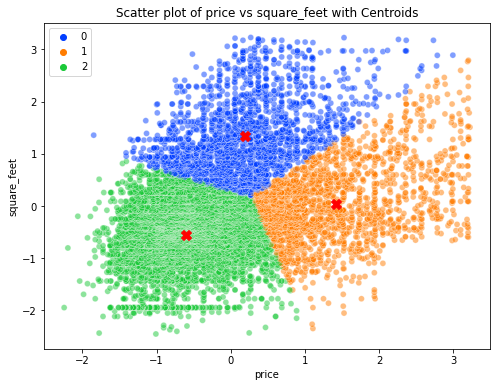

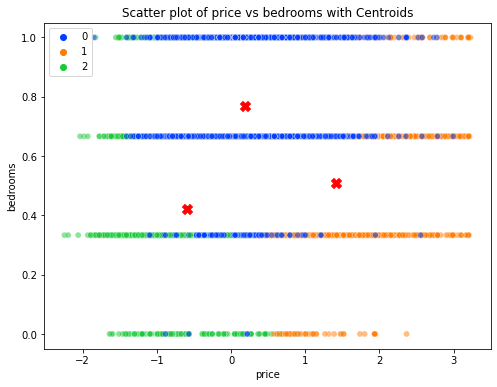

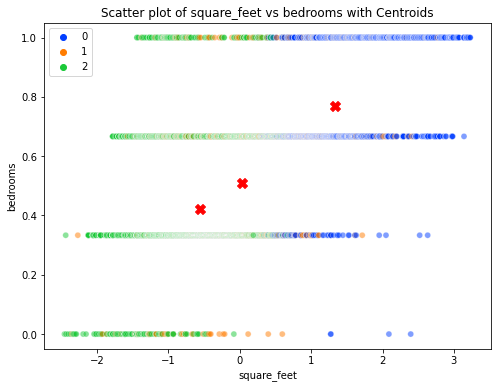

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot with Seaborn
sns.pairplot(scaled_features_df, hue='Cluster', palette='bright')

# Calculate centroids
centroids = kmeans.cluster_centers_

# Plot centroids on the pairplot for each pair of features
features = ['price', 'square_feet', 'bedrooms']
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=scaled_features_df[features[i]], y=scaled_features_df[features[j]], 
                        hue=scaled_features_df['Cluster'], palette='bright', alpha=0.5)
        plt.scatter(centroids[:, i], centroids[:, j], s=100, c='red', marker='X')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.title(f'Scatter plot of {features[i]} vs {features[j]} with Centroids')
        plt.legend()
        plt.show()


In [25]:
sample_data = selected_features.sample(n=2000, random_state= 1)

In [26]:
sample_data.head(5)

,price,square_feet,bedrooms
4551,1416,776,1.0
5680,1445,870,2.0
219,800,300,1.0
8815,1399,1412,3.0
2833,751,665,1.0


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np 

# Separating the features
price_square_feet = sample_data[['price', 'square_feet']]
bedrooms = sample_data[['bedrooms']]

# Applying StandardScaler to 'price' and 'square_feet'
standard_scaler = StandardScaler()
sample_price_square_feet = standard_scaler.fit_transform(price_square_feet)

# Applying MinMaxScaler to 'bedrooms'
minmax_scaler = MinMaxScaler()
sample_bedrooms = minmax_scaler.fit_transform(bedrooms)

# Combining the scaled features
scaled_sample= np.hstack((sample_price_square_feet, sample_bedrooms))

In [28]:
# Creating a DataFrame of the scaled features for clustering
scaled_sample_df = pd.DataFrame(scaled_sample, columns=['price_scaled', 'square_feet_scaled', 'bedrooms_scaled'])
scaled_sample_df.head()

,price_scaled,square_feet_scaled,bedrooms_scaled
0,0.295301,-0.198173,0.333333
1,0.356071,0.121944,0.666667
2,-0.995548,-1.819191,0.333333
3,0.259676,1.967725,1.000000
4,-1.098229,-0.576183,0.333333


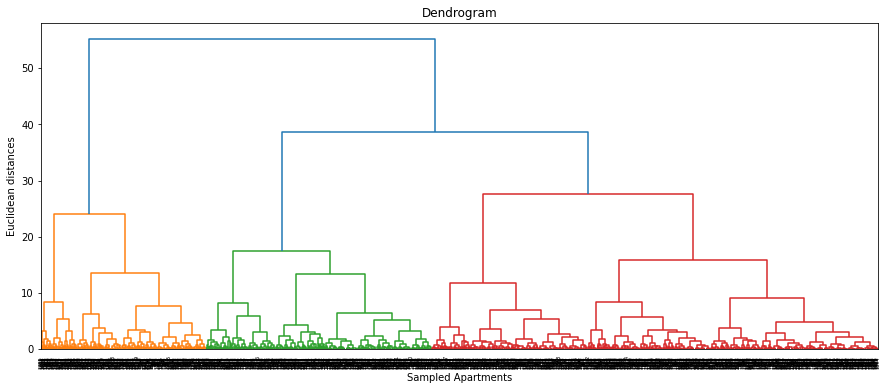

In [29]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(scaled_sample, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Sampled Apartments')
plt.ylabel('Euclidean distances')
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters = 4, affinity= 'euclidean', linkage= 'ward')
y_hc = hc.fit_predict(scaled_sample)

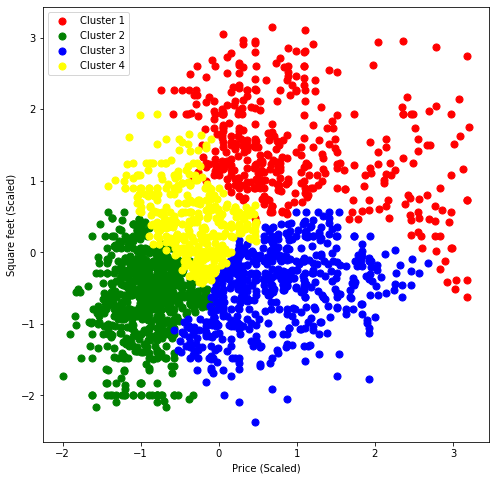

In [34]:
plt.figure(figsize= (8,8))
plt.scatter(scaled_sample[y_hc == 0, 0], scaled_sample[y_hc == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(scaled_sample[y_hc == 1, 0], scaled_sample[y_hc == 1, 1], s=50, c='green', label='Cluster 2')
plt.scatter(scaled_sample[y_hc == 2, 0], scaled_sample[y_hc == 2, 1], s=50, c='blue', label='Cluster 3')
plt.scatter(scaled_sample[y_hc == 3, 0], scaled_sample[y_hc == 3, 1], s=50, c='yellow', label='Cluster 4')
plt.xlabel('Price (Scaled)')
plt.ylabel('Square feet (Scaled)')
plt.legend()
plt.show()

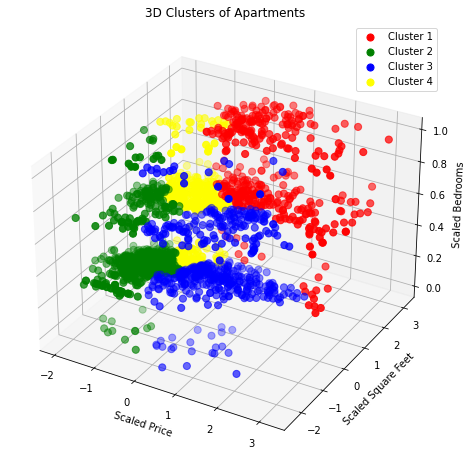

In [32]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

# Scatter plot for each cluster in 3D
ax.scatter(scaled_sample[y_hc == 0, 0], scaled_sample[y_hc == 0, 1], scaled_sample[y_hc == 0, 2], s=50, c='red', label='Cluster 1')
ax.scatter(scaled_sample[y_hc == 1, 0], scaled_sample[y_hc == 1, 1], scaled_sample[y_hc == 1, 2], s=50, c='green', label='Cluster 2')
ax.scatter(scaled_sample[y_hc == 2, 0], scaled_sample[y_hc == 2, 1], scaled_sample[y_hc == 2, 2], s=50, c='blue', label='Cluster 3')
ax.scatter(scaled_sample[y_hc == 3, 0], scaled_sample[y_hc == 3, 1], scaled_sample[y_hc == 3, 2], s=50, c='yellow', label='Cluster 4')

# Adding axis labels and title
ax.set_xlabel('Scaled Price')
ax.set_ylabel('Scaled Square Feet')
ax.set_zlabel('Scaled Bedrooms')
ax.set_title('3D Clusters of Apartments')

# Adding the legend
plt.legend()

# Display the plot
plt.show()
